In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
weights = pd.read_csv('../data/weights.csv')

In [3]:
weights.head()

,weight
0,66.277961
1,75.910138
2,92.583114
3,39.768624
4,99.007296


In [4]:
weights.shape

(10000, 1)

In [5]:
def plot_distribution(data, title, xlabel):
    
    fig, ax = plt.subplots(figsize=(9, 7))
    
    if hasattr(data, 'weight'):
        sns.distplot(data, kde_kws=dict(cut=0), ax=ax)
    else:
        sns.distplot(data, kde_kws=dict(cut=0), ax=ax)
        
    ax.tick_params(labelsize=12)
    ax.set_title(title, size=18)
    ax.set_xlabel(xlabel, size=14)
    
    if hasattr(data, 'weight'):
        fig.savefig('../figures/data_distribution.jpg')
    else:
        fig.savefig('../figures/sampling_distribution.jpg')

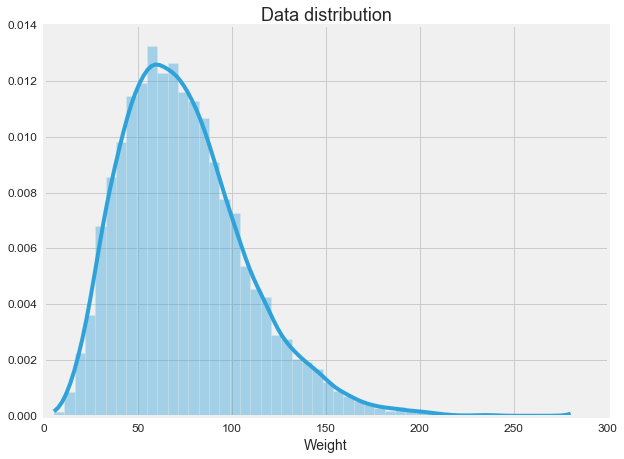

In [6]:
plot_distribution(weights, title='Data distribution',
                  xlabel='Weight')

In [7]:
weights.weight.mean()

74.46270034314219

In [8]:
def bootstrap(data, rep=10000):
    
    means = []
    n = len(data)
    
    for i in range(rep):
        sample = data.sample(n=n, replace=True)
        mean = sample.weight.mean()
        means.append(mean)
    
    return pd.DataFrame(means, columns=['means'])

In [9]:
bootstrap_means = bootstrap(weights)

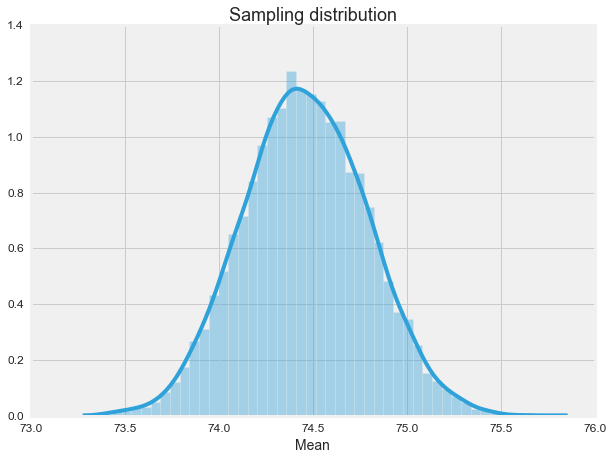

In [10]:
plot_distribution(bootstrap_means, title='Sampling distribution',
                 xlabel='Mean')

In [11]:
def confidence_intervals(data, confidence_level=0.95):
    
    low_end = (1 - confidence_level) / 2
    high_end = 1 - low_end
    
    bottom_percentile = np.round(data.means.quantile(low_end), 2)
    top_percentile = np.round(data.means.quantile(high_end), 2)
    
    print('The {}% confidence interval is [{}, {}]'.format(
        confidence_level * 100, bottom_percentile, top_percentile))

In [12]:
for ci in [0.6, 0.7, 0.8, 0.9, 0.95, 0.99]:
    confidence_intervals(bootstrap_means, confidence_level=ci)

The 60.0% confidence interval is [74.18, 74.74]
The 70.0% confidence interval is [74.11, 74.81]
The 80.0% confidence interval is [74.04, 74.89]
The 90.0% confidence interval is [73.92, 75.01]
The 95.0% confidence interval is [73.83, 75.11]
The 99.0% confidence interval is [73.61, 75.31]


In [13]:
bootstrap_means.means.std()

0.3310745269792375

This is the standard error.